In [2]:
import pandas as pd
import numpy as np

In [3]:
base = pd.read_csv('datasetTitanic.csv')

In [4]:
base.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
base.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [8]:
faltante = np.array(base.iloc[:, 5])

In [9]:
faltante = faltante.reshape(-1, 1);

In [10]:
imputer = imputer.fit_transform(faltante)

In [11]:
base.Age = imputer

In [12]:
base.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
def plotaGrafico(atributo):
    sobrevivente = base[base['Survived']==1][atributo].value_counts()
    mortos = base[base['Survived']==0][atributo].value_counts()
    df = pd.DataFrame([sobrevivente, mortos])
    df.index = ['Sobreviventes', 'Mortos']
    df.plot(kind='line', stacked=True, figsize=(10,5))

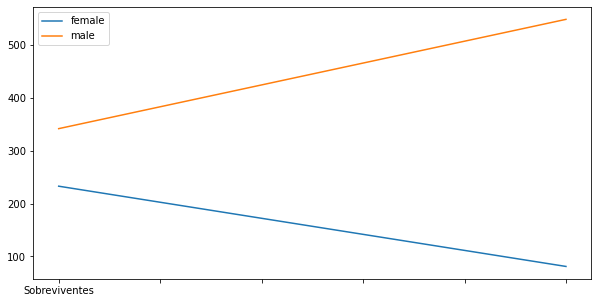

In [14]:
plotaGrafico('Sex')

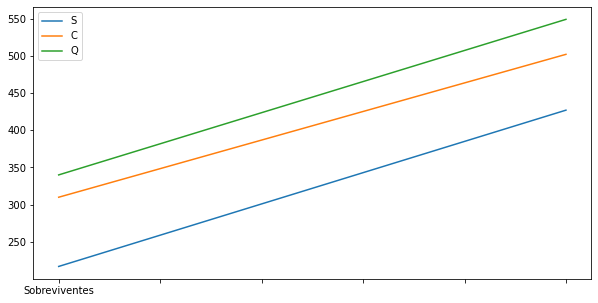

In [15]:
plotaGrafico('Embarked')

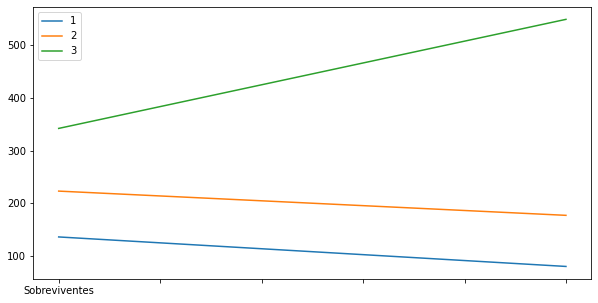

In [16]:
plotaGrafico('Pclass')